In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community import girvan_newman, greedy_modularity_communities

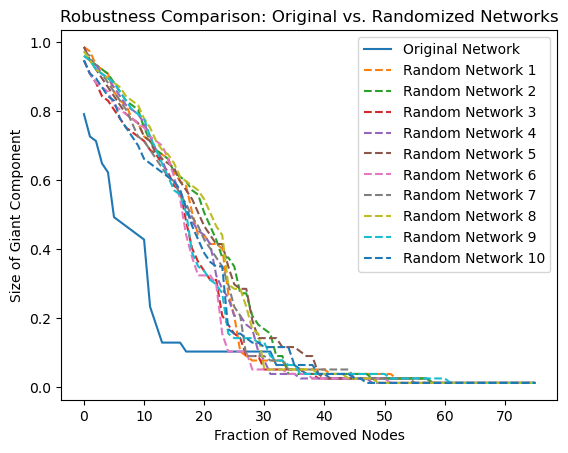

In [2]:
# Load the "lesmis.gml" dataset
G = nx.read_gml("lesmis.gml")

# Generate randomized networks
num_random_networks = 10
random_networks = []

for _ in range(num_random_networks):
    random_net = nx.configuration_model([deg for _, deg in G.degree()])
    random_net = nx.Graph(random_net)
    random_networks.append(random_net)

# Perform a targeted attack using degree centrality
def targeted_attack(network):
    num_nodes = len(network)
    giant_components = []

    for node in sorted(network.nodes(), key=lambda x: -nx.degree_centrality(network)[x]):
        network.remove_node(node)
        
        if len(network) == 0:  # Check if the network is empty
            break
        
        largest_cc = max(nx.connected_components(network), key=len)
        giant_components.append(len(largest_cc) / num_nodes)

    return giant_components

original_results = targeted_attack(G)
randomized_results = [targeted_attack(net) for net in random_networks]

# Plotting
plt.plot(original_results, label="Original Network")
for i, results in enumerate(randomized_results):
    plt.plot(results, linestyle="--", label=f"Random Network {i+1}")

plt.xlabel("Fraction of Removed Nodes")
plt.ylabel("Size of Giant Component")
plt.title("Robustness Comparison: Original vs. Randomized Networks")
plt.legend()
plt.show()


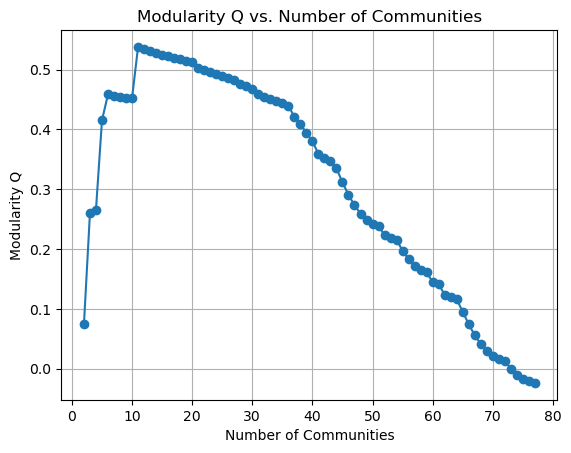

In [10]:
# Load the Les Misérables dataset
#G = nx.read_gml("lesmis.gml")

# Run Girvan-Newman algorithm
comp = girvan_newman(G)

# Store modularity and community count for each partition
modularity_values = []
community_counts = []

for communities in comp:
    Q = modularity(G, communities)
    modularity_values.append(Q)
    community_counts.append(len(communities))

# Plot the graph of modularity Q against number of communities
plt.plot(community_counts, modularity_values, marker='o')
plt.xlabel('Number of Communities')
plt.ylabel('Modularity Q')
plt.title('Modularity Q vs. Number of Communities')
plt.grid(True)
plt.show()


In [15]:
# Initialize variables to store the best partition
# Load the Les Misérables dataset
G = nx.read_gml("lesmis.gml")
best_partition = None
best_modularity = -1

# Iterate through partitions and find the best one
for communities in comp:
    Q = modularity(G, communities)
    if Q > best_modularity:
        best_modularity = Q
        best_partition = communities

# Output the results
num_communities = len(best_partition)
print("Number of Communities:", num_communities)
print("Modularity Value:", best_modularity)

TypeError: object of type 'NoneType' has no len()

In [13]:
# Run Girvan-Newman algorithm
comp_girvan = girvan_newman(G)
best_partition_girvan = max(comp_girvan, key=lambda communities: modularity(G, communities))

# Run Greedy algorithm
communities_greedy = greedy_modularity_communities(G)
partition_greedy = [list(community) for community in communities_greedy]

# Draw the network with colors indicating partitions
def draw_partitioned_network(G, partition, title):
    colors = ['r', 'g', 'b', 'c']  # One color for each partition
    node_colors = []
    for node in G.nodes():
        for idx, part in enumerate(partition):
            if node in part:
                node_colors.append(colors[idx % len(colors)])
                break
    
    pos = nx.spring_layout(G, seed=42)  # Layout for visualization
    nx.draw(G, pos, node_color=node_colors, with_labels=True)
    plt.title(title)
    plt.show()



# Calculate modularity for both partitions
modularity_girvan = modularity(G, best_partition_girvan)
modularity_greedy = modularity(G, partition_greedy)

# Output modularity values
print("Modularity (Girvan-Newman):", modularity_girvan)
print("Modularity (Greedy):", modularity_greedy)


Modularity (Girvan-Newman): 0.5380680761361523
Modularity (Greedy): 0.5005967511935024


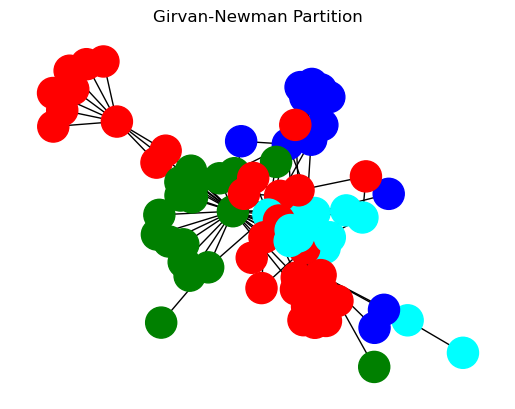

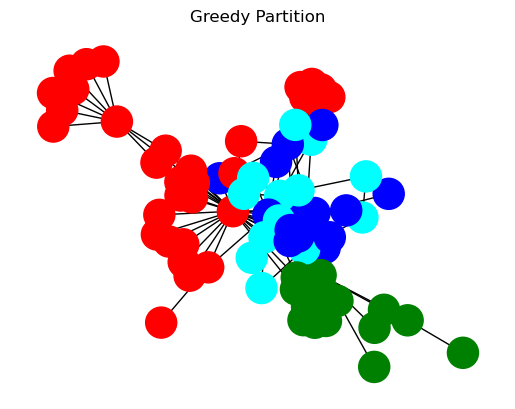

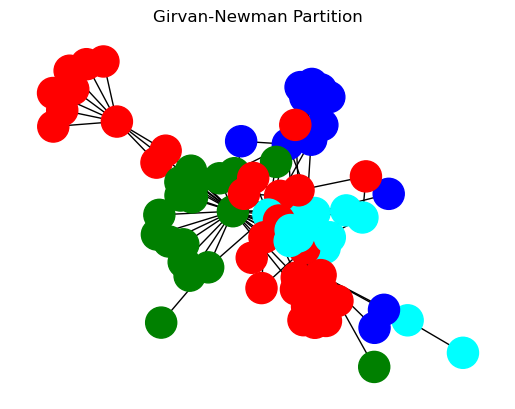

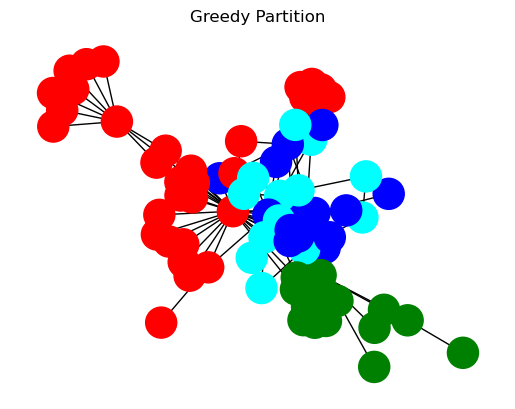

Modularity (Girvan-Newman): 0.5380680761361523
Modularity (Greedy): 0.5005967511935024


In [12]:

# Load the Les Misérables dataset
G = nx.read_gml("lesmis.gml")

# Run Girvan-Newman algorithm
comp_girvan = girvan_newman(G)
best_partition_girvan = max(comp_girvan, key=lambda communities: modularity(G, communities))

# Run Greedy algorithm
communities_greedy = greedy_modularity_communities(G)
partition_greedy = [list(community) for community in communities_greedy]

# Plot the network with colors indicating partitions (without node labels)
def plot_partitioned_network(G, partition, title):
    colors = ['red', 'green', 'blue', 'cyan']  # One color for each partition
    node_colors = []
    for node in G.nodes():
        for idx, part in enumerate(partition):
            if node in part:
                node_colors.append(colors[idx % len(colors)])
                break
    
    pos = nx.spring_layout(G, seed=42)  # Layout for visualization
    fig, ax = plt.subplots()
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, ax=ax)
    plt.title(title)
    plt.show()

# Plot the Girvan-Newman partitioned network without node labels
plot_partitioned_network(G, best_partition_girvan, "Girvan-Newman Partition")

# Plot the Greedy partitioned network without node labels
plot_partitioned_network(G, partition_greedy, "Greedy Partition")


# Plot the Girvan-Newman partitioned network
plot_partitioned_network(G, best_partition_girvan, "Girvan-Newman Partition")

# Plot the Greedy partitioned network
plot_partitioned_network(G, partition_greedy, "Greedy Partition")

# Calculate modularity for both partitions
modularity_girvan = modularity(G, best_partition_girvan)
modularity_greedy = modularity(G, partition_greedy)

# Output modularity values
print("Modularity (Girvan-Newman):", modularity_girvan)
print("Modularity (Greedy):", modularity_greedy)


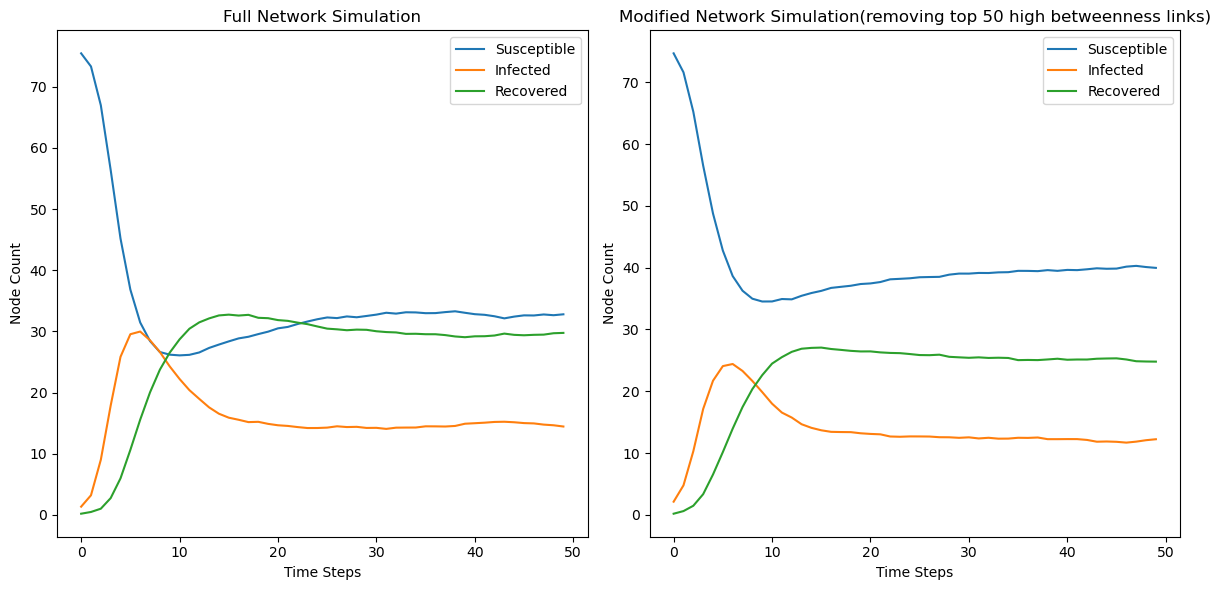

In [44]:
# SIRS model parameters
alpha = 0.7
beta = 0.3
gamma = 0.2
delta = 0.1

def sirs_simulation(network, initial_infected, time_steps):
    # Initialize node states
    states = {node: 'S' for node in network.nodes}
    states[initial_infected] = 'I'

    # Lists to store the counts of S, I, and R nodes at each time step
    susceptible_count = []
    infected_count = []
    recovered_count = []

    for t in range(time_steps):
        new_states = states.copy()

        for node in network.nodes:
            if states[node] == 'S':
                # Calculate infection probability based on infected neighbors
                infected_neighbors = [neighbor for neighbor in network.neighbors(node) if states[neighbor] == 'I']
                infection_prob = 1 - (1 - beta) ** len(infected_neighbors)
                if np.random.random() < infection_prob:
                    new_states[node] = 'I'

            elif states[node] == 'I':
                # Calculate recovery probability
                if np.random.random() < gamma:
                    new_states[node] = 'R'

            elif states[node] == 'R':
                # Calculate re-susceptibility probability
                if np.random.random() < delta:
                    new_states[node] = 'S'

        states = new_states

        # Count the number of nodes in each state
        susceptible_count.append(sum(1 for state in states.values() if state == 'S'))
        infected_count.append(sum(1 for state in states.values() if state == 'I'))
        recovered_count.append(sum(1 for state in states.values() if state == 'R'))

    return susceptible_count, infected_count, recovered_count

# Perform simulations
num_runs = 250
time_steps = 50

# Plot 1: Full network simulation
initial_infected_node = np.random.choice(list(G.nodes))
s_susceptible, s_infected, s_recovered = np.zeros(time_steps), np.zeros(time_steps), np.zeros(time_steps)
for _ in range(num_runs):
    s, i, r = sirs_simulation(G, initial_infected_node, time_steps)
    s_susceptible += np.array(s)
    s_infected += np.array(i)
    s_recovered += np.array(r)
s_susceptible /= num_runs
s_infected /= num_runs
s_recovered /= num_runs

# Plot 2: Modified network simulation
link_betweenness = nx.edge_betweenness_centrality(G)
top_links = sorted(link_betweenness.keys(), key=lambda x: link_betweenness[x], reverse=True)[:50]
G_modified = G.copy()
G_modified.remove_edges_from(top_links)
initial_infected_node = np.random.choice(list(G_modified.nodes))
m_susceptible, m_infected, m_recovered = np.zeros(time_steps), np.zeros(time_steps), np.zeros(time_steps)
for _ in range(num_runs):
    s, i, r = sirs_simulation(G_modified, initial_infected_node, time_steps)
    m_susceptible += np.array(s)
    m_infected += np.array(i)
    m_recovered += np.array(r)
m_susceptible /= num_runs
m_infected /= num_runs
m_recovered /= num_runs

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(time_steps), s_susceptible, label='Susceptible')
plt.plot(range(time_steps), s_infected, label='Infected')
plt.plot(range(time_steps), s_recovered, label='Recovered')
plt.title('Full Network Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Node Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(time_steps), m_susceptible, label='Susceptible')
plt.plot(range(time_steps), m_infected, label='Infected')
plt.plot(range(time_steps), m_recovered, label='Recovered')
plt.title('Modified Network Simulation(removing top 50 high betweenness links)')
plt.xlabel('Time Steps')
plt.ylabel('Node Count')
plt.legend()

plt.tight_layout()
plt.show()


The striking similarity between the two plots, despite the removal of 50 high-betweenness links in the second scenario, can be attributed to the consistency of infection, recovery, and re-susceptibility probabilities (α=0.7, β=0.3, γ=0.2, δ=0.1), shared initial conditions, network connectivity, and the moderate number of simulation runs (250) and time steps (50) employed in the code. The Erdos-Renyi random network structure's inherent connectivity (p=0.1) and the relatively high transmission probability (β=0.3) facilitate disease spread even with fewer connections, masking potential differences in patterns. The choice of betweenness centrality for link removal might not effectively account for the network's lack of clear community structure, suggesting alternative centrality metrics like degree or eigenvector centrality for improved insight. A more substantial number of simulations and extended time frames could unveil clearer distinctions between the scenarios, emphasizing the role of different factors in influencing epidemic dynamics.